# Credit Card Fraud Detection

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Download and unzip the dataset**
   * **Split the dataset**
   
### [3. Exploratory Analysis](#explore)

### [4. Model Architecture](#cnn)
   * **Set hyperparameters**
   * **Define the model**
   * **Set optimizer** 
   * **Compile model**
   * **Train model**

### [5. Model Evaluation](#eval)
   * **Training Accuracy vs Validation Accuracy**
   * **Training Loss vs Validation Loss**
   * **Model Accuracy**
   * **Observations**

### [6. Prediction](#predict)

### [7. Save Model to Disk](#save)
  

<a id="intro"></a>
### 1. Introduction

#### About the dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

#### Problem statement
Classify the transactions as **fraud (1)** and **legitimate (0)**.

#### Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud/

<a id="data"></a>
### 2. Data Preparation

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


#### Download and unzip the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

<a id="explore"></a>
### 3. Exploratory Analysis

In [6]:
# Printing unique values present 
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [7]:

df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.919560e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.688174e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.769071e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.782312e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552563e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.010663e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.694249e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.927028e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.137024e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.768627e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.170318e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.810658e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.693438e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.479045e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.482336e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392007e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.528491e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.328772e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.049732e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.085503e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.537294e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  7.959909e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.367590e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.458112e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.453003e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.699104e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660161e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.206049e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [8]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

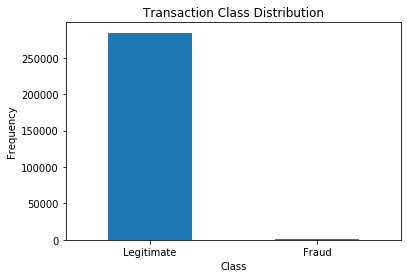

In [9]:
# Ploting the graph for transaction class distribution

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

Labels = ['Legitimate','Fraud']

plt.xticks(range(2), Labels)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [10]:
frauds = df.loc[df['Class'] == 1]
legitimate = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(legitimate), "regular data points")

We have 492 fraud data points and 284315 regular data points


In [11]:
# amount of money used in different transaction classes
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

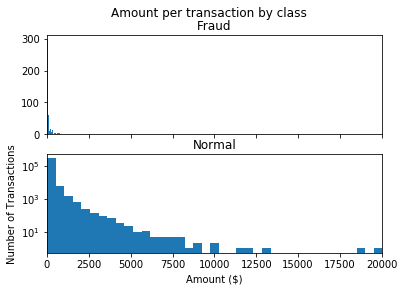

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legitimate.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

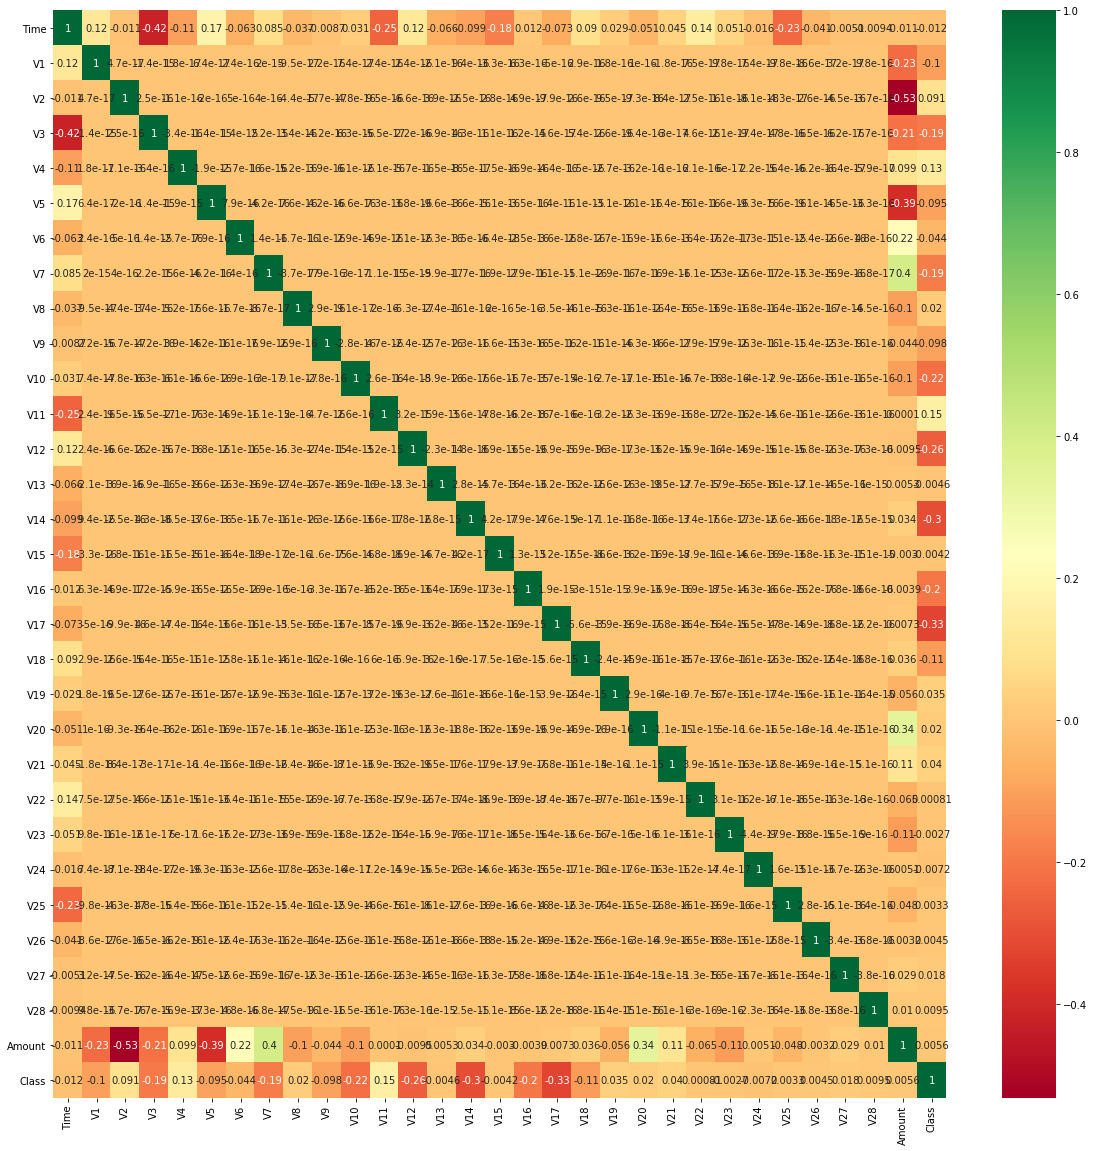

In [14]:
## Correlation

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Split the data

In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
x = df.drop('Class',axis=1)
y = df['Class']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 0 ,stratify = y)

In [18]:
x_train.shape

(190820, 30)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [21]:
x_test.shape

(93987, 30)

In [22]:
x_train.shape,x_test.shape

((190820, 30), (93987, 30))

<a id="cnn"></a>
### 4. Model Architecture

#### Set hyperparameters

In [23]:
activation_function = 'relu'
loss = 'binary_crossentropy'
hidden_units_layer_1 = 34
hidden_units_layer_2 = 36
output_units = 1
batch_size = 5
epochs = 15
learning_rate = 0.001

#### Define the model

In [24]:
model = Sequential([
    Dense(hidden_units_layer_1, input_dim=30, activation=activation_function),
    Dense(hidden_units_layer_2, activation=activation_function),
    Dense(output_units, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 34)                1054      
_________________________________________________________________
dense_2 (Dense)              (None, 36)                1260      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 2,351
Trainable params: 2,351
Non-trainable params: 0
_________________________________________________________________


#### Set optimizer 

In [25]:
optimizer = Adam(lr = 0.001)

#### Compile model

In [26]:
model.compile(optimizer, loss= loss, metrics=['accuracy'])


#### Train model

In [27]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)


Train on 152656 samples, validate on 38164 samples
Epoch 1/15
 - 31s - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 2/15
 - 30s - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9996
Epoch 3/15
 - 30s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9996
Epoch 4/15
 - 30s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 5/15
 - 30s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 6/15
 - 30s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 7/15
 - 30s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 0.9995
Epoch 8/15
 - 32s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 9/15
 - 30s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0055 - val_accuracy: 0.9995
Epoch 10/15
 - 31s - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0044 - val_accuracy: 0.9996
Epoch 11

<a id="eval"></a>
### 5. Model Evaluation

#### Training Accuracy vs Validation Accuracy

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
legend = ['Train','Validation']

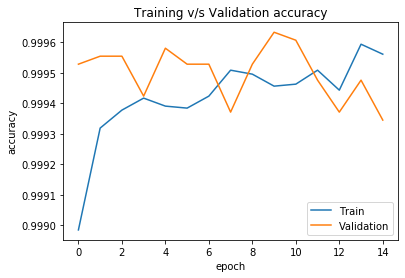

In [29]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("Training v/s Validation accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(legend);

#### Training Loss vs Validation Loss

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
legend = ['Training_Loss','Validation_loss']

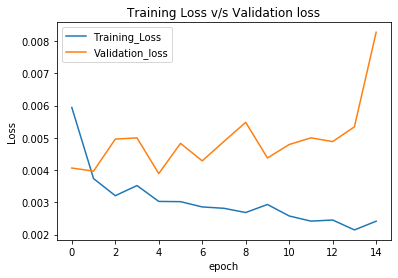

In [31]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Training Loss v/s Validation loss")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(legend);

#### Model Accuracy

In [32]:
lss,acc =  model.evaluate(x_test, y_test, verbose=0)
print("Loss: {} and Accuracy : {}".format(lss,acc))


Loss: 0.007493834484348181 and Accuracy : 0.9993403553962708


#### Observations:
 99% is a good accuracy this is because previously I have used standard scaler for test and train data.The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1. The test accuracy is also less it is about 0.007493834....

<a id="predict"></a>
### 6. Prediction

In [33]:
y_predicted = model.predict(x_test)


In [34]:
def plot_confusion_matrix(cm,classes,normalize=False,
                          title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=30)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')

    plt.xlabel('predicted label')

In [35]:
predictions = model.predict_classes(x_test,batch_size=100,verbose=0)


In [36]:
cm = confusion_matrix(y_test, predictions)


confusion  matrix without normalization
[[93822     3]
 [   59   103]]


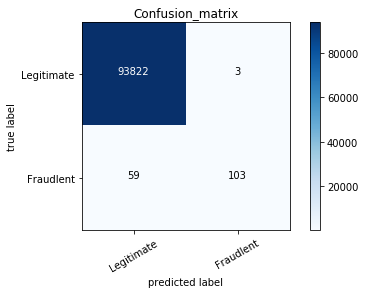

In [37]:
import itertools
cm_plot_labels = ['Legitimate', 'Fraudlent']
_ = plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')


<a id="save"></a>
### 7. Save Model to Disk

In [1]:
# Do not commit
#model.save('creditcard_fraud_detection.h5')